# Maximum Likelihood for the Multivariate Gaussian

This notebook illustrates the process of maximum likelihood estimation for the multivariate Gaussian distribution.

First, we import the required packages. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats

We specify the "true" parameters of the Gaussian distribution, whose parameters will be estimated via Maximum Likelihood later on. We will concentrate on the bi-dimensional case, i.e., D = 2, for the sake of visualization.

In [8]:
true_mean = np.array([ -1, 2 ])
true_covariance = np.array([[ 2.0, 1.7 ],[ 1.7, 3.0 ]])
print(true_mean)
print(true_covariance)

[-1  2]
[[2.  1.7]
 [1.7 3. ]]


We initialize the random seed to zero and draw a few samples from such a distribution. For this, we use the Cholesky factorization of the covariance matrix. Any other factorization can be used.

In [9]:
np.random.seed(0)

# We now compute the factorization

L = np.linalg.cholesky(true_covariance)

# We check that the factorization is right, i.e., true_covariance = L L^t

print(np.dot(L, L.T))

[[2.  1.7]
 [1.7 3. ]]


In [10]:
# We now generate the Gaussian samples by sampling from a 
# standard Gaussian and applying the transformation mean + standard_normal_sample L

N_samples = 1000

standard_normal_samples = np.random.normal(size = ((N_samples, 2)))

samples = true_mean + np.dot(standard_normal_samples, L.T)


We plot the generated samples alongside with the corresponding level curves of the Gaussian density.

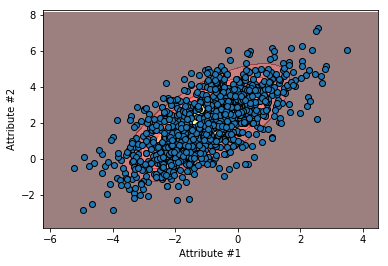

In [11]:
x_min = np.min(samples[ :, 0 ])
x_max = np.max(samples[ :, 0 ])
y_min = np.min(samples[ :, 1 ])
y_max = np.max(samples[ :, 1 ])

xx, yy = np.meshgrid(np.arange(x_min-1, x_max+1, 0.1),
                     np.arange(y_min-1, y_max+1, 0.1))

plt.figure()
plt.xlabel('Attribute #1')
plt.ylabel('Attribute #2')
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# We plot the contour curves of the Gaussian pdf

mv = stats.multivariate_normal(mean = true_mean, cov = true_covariance)

Z = mv.pdf(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.5, cmap=plt.cm.hot)
plt.scatter(samples[ :, 0 ], samples[ :, 1 ], cmap=plt.cm.Set1, \
    edgecolor='k')

plt.show()

We now use the maximum likelihood estimators for the mean and covariance matrix.

In [12]:
mean_ml = np.mean(samples, axis = 0)
print(mean_ml)
covariance_ml = np.dot((samples - mean_ml).T, samples - mean_ml) / N_samples
print(covariance_ml)

[-1.03074003  1.96152162]
[[1.89885311 1.59053364]
 [1.59053364 2.83070212]]


We observe that the estimates are very similar to the actual values, defined above. 

Numpy also provies the function numpy.cov to estimate the covariance matrix. The estimator used is similar to the ML but corrected to have no bias. It is $$\hat{\bf \Sigma}_\text{ML}=\frac{1}{N-1}\sum_{i=1}^N (\mathbf{x}_i - \hat{\bf \mu}_\text{ML})(\mathbf{x}_i - \hat{\bf \mu}_\text{ML})^T$$.

In [7]:
print(np.cov(samples.T))

[[ 2.10989483  1.74901928]
 [ 1.74901928  3.06971643]]


The estimate is very similar, yet different. We check that it is given by the previous estimator.

In [8]:
print(np.cov(samples.T) * (N_samples - 1) / N_samples)

[[ 2.08879588  1.73152908]
 [ 1.73152908  3.03901927]]
